# Principe de superposition

Cet exercice regarde la réponse de deux corps adjacent sur la réponse gravimétrique, qui est la somme des contributions de chaque corps.

Notebook inspiré de: https://glq2200.clberube.org/

In [14]:
# *** On commence toujours par importer les librairies requises

# outils numériques
import numpy as np  

# libraries graphiques
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle
plt.rcParams.update({'font.size': 16}) # Définir taille de police par défaut des graphs

In [15]:
# *** Paramètres et fonctions de base

# Définir la constante gravitationelle
G = 6.67408e-11  # m^3 kg^-1 s^-2

# Définir une fonction qui calcule la réponse gravimétrique d'une sphère
def gravite_sphere(x, z, x0, z0, a, rho):
    """
    Réponse gravimétrique d'une sphère
    
    arguments:
    x:   Vecteur de position des points de mesures le long de l'axe x
    z:   Vecteur de position des points de mesures le long de l'axe z (verticale)
    x0:  Position en x du centre de la sphère
    z0:  Position en z du centre de la sphère
    a:   Rayon de la sphère
    rho: Contraste de densité de la sphère
    """
    A = G * rho * (4/3) * np.pi * a**3
    B = (z - z0) / ((x - x0)**2 + (z - z0)**2)**(3/2)
    return A * B

In [16]:
# *** Définir les points de mesure 
x = np.arange(-700, 700, 1)  # un vecteur représentant l'axe x
z = 0  # on a supposé que la topographie est plate donc le gravimètre est à z = 0


In [17]:
# Définition de la première anomalie: cavité

x0_cv = -300  # position de la cavité sur l'axe x
z0_cv = -200  # position de la cavité  sur l'axe z
a_cv = 50  # rayon de la cavité 
rho_cv = -2600  # contraste de densité de la cavité 
# Accélération gravitationnelle de la cavité 
gz_cv = gravite_sphere(x, z, x0_cv, z0_cv, a_cv, rho_cv)

In [18]:
# Définition de la deuxième anomalie: excès de masse

x0_em = 300  # position de l'excès de masse sur l'axe x
z0_em = -200  # position de l'excès de masse sur l'axe z
a_em = 100  # rayon de l'excès de masse
rho_em = +1000  # contraste de densité de l'excès de masse
# Accélération gravitationnelle de l'excès de masse
gz_em = gravite_sphere(x, z, x0_em, z0_em, a_em, rho_em)

In [19]:
# Signal total
gz_total = gz_cv + gz_em

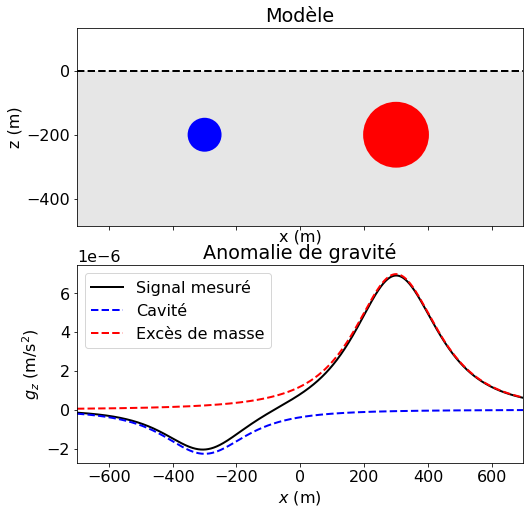

In [29]:
# Graphique
zmin = min([z0_cv-a_cv, z0_em-a_em]) # profondeur max des anomalies

# *** Faire un graphique montrant la réponse gravimétrique
fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True)

# Modèle 
ax[0].axhspan(2*zmin,0,color=[.9, .9, .9])
ax[0].axhline(0,c="k",ls="--",lw=2)
circle_cv = plt.Circle((x0_cv, z0_cv), a_cv, color='b', lw=2, fill=True)
circle_em = plt.Circle((x0_em, z0_em), a_em, color='r', lw=2, fill=True)
ax[0].add_patch(circle_cv)
ax[0].add_patch(circle_em)
ax[0].set(xlabel="x (m)", ylabel="z (m)", title="Modèle")
ax[0].set_aspect('equal', adjustable="datalim")
ax[0].set(ylim=(1.5*zmin,100), xlim=(x[0],x[-1]))

# Réponse gravimetrique
ax[1].plot(x,gz_total, color="k", linewidth=2, linestyle="-", label="Signal mesuré")
ax[1].plot(x,gz_cv, color="b", linewidth=2, linestyle="--", label="Cavité")
ax[1].plot(x,gz_em, color="r", linewidth=2, linestyle="--", label="Excès de masse")
ax[1].set(xlabel='$x$ (m)', ylabel='$g_z$ (m/s$^2$)', title="Anomalie de gravité")
ax[1].legend()

plt.show()

# Modèle en coquille

Différents corps peuvent être combinés pour former des géométries plus complexes. Dans cet exemple nous allons modéliser la réponse d’une coquille de forme sphérique avec une épaisse de 25 m en soustrayant la réponse de deux sphères dont les rayons sont 100 et 75 m

In [21]:
# *** On commence par entrer les paramètres pour la sphère externe :

x0_ext = 0  # position de la sphère externe sur l'axe x
z0_ext = -200  # position de la sphère externe sur l'axe z
a_ext = 100  # rayon de la sphère externe
rho_ext = 2600  # contraste de densité de la sphere externe
# Accélération gravitationnelle de la sphère externe
gz_ext = gravite_sphere(x, z, x0_ext, z0_ext, a_ext, rho_ext)

In [22]:
# *** Et pour la sphère fictive interne :

x0_int = 0  # position de la sphère interne sur l'axe x
z0_int = -200  # position de la sphère interne sur l'axe z
a_int = 75  # rayon de la sphère interne
rho_int = -2600  # contraste de densité de la sphere interne
# Accélération gravitationnelle de la sphère interne
gz_int = gravite_sphere(x, z, x0_int, z0_int, a_int, rho_int)

In [23]:
# *** Contribution totale

gz_coquille = gz_ext + gz_int

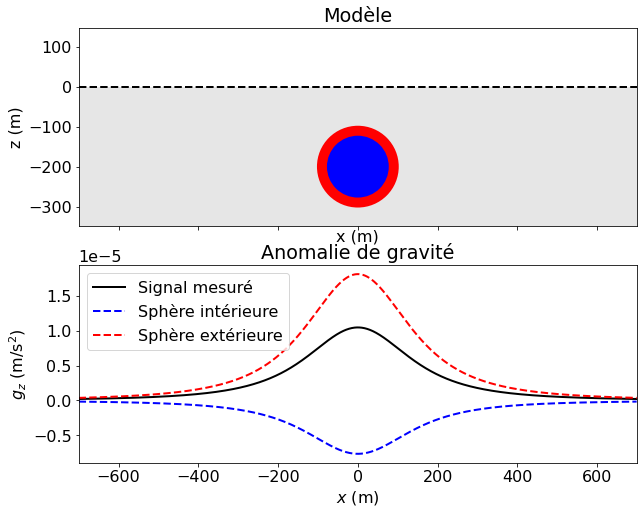

In [35]:
# Graphique
zmin = z0_ext # profondeur max des anomalies

# *** Faire un graphique montrant la réponse gravimétrique
fig, ax = plt.subplots(2,1, figsize=(10,8), sharex=True)

# Modèle 
ax[0].axhspan(2*zmin,0,color=[.9, .9, .9])
ax[0].axhline(0,c="k",ls="--",lw=2)
circle_ext = plt.Circle((x0_ext, z0_ext), a_ext, color='r', lw=2, fill=True)
circle_int = plt.Circle((x0_int, z0_int), a_int, color='b', lw=2, fill=True)
ax[0].add_patch(circle_ext)
ax[0].add_patch(circle_int)
ax[0].set(xlabel="x (m)", ylabel="z (m)", title="Modèle")
ax[0].set_aspect('equal', adjustable="datalim")
ax[0].set(ylim=(1.5*zmin,100), xlim=(x[0],x[-1]))

# Réponse gravimetrique
ax[1].plot(x,gz_coquille, color="k", linewidth=2, linestyle="-", label="Signal mesuré")
ax[1].plot(x,gz_int, color="b", linewidth=2, linestyle="--", label="Sphère intérieure")
ax[1].plot(x,gz_ext, color="r", linewidth=2, linestyle="--", label="Sphère extérieure")
ax[1].set(xlabel='$x$ (m)', ylabel='$g_z$ (m/s$^2$)', title="Anomalie de gravité")
ax[1].legend()

plt.show()
